In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from experiments.exp_basic import Exp_Basic
from experiments.exp_long_term_forecasting_partial import Exp_Long_Term_Forecast_Partial
from experiments.exp_long_term_forecasting import Exp_Long_Term_Forecast
from data_provider.data_factory import data_provider
import random
import torch
import sys
import os
from collections import namedtuple

sys.argv = ['']

fix_seed = 2024
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [2]:
from utils.load import parse_bash_script, get_default_config, merge_args

In [3]:
bash_script_file = 'scripts/best_S.sh'  # Replace with your bash script file name
with open(bash_script_file, 'r') as f:
    script_content = f.read()

bash_args = parse_bash_script(script_content)
bash_args.model_id

'forex_U'

In [4]:
default_args = get_default_config().parse_args()
default_args

Namespace(is_training=1, model_id='Exchange_96_96', model='iTransformer', data='custom', root_path='D:/FPT/SU24/DSP391m/code/crawl/data/clean/', data_path='df_combine.csv', features='S', target='Sell', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=96, enc_in=7, dec_in=7, c_out=7, d_model=128, n_heads=8, e_layers=2, d_layers=1, d_ff=128, moving_avg=25, factor=1, distil=True, dropout=0.1, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, itr=1, train_epochs=10, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='MSE', lradj='type1', use_amp=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', exp_name='partial_train', channel_independence=False, inverse=False, class_strategy='projection', target_root_path='D:/FPT/SU24/DSP391m/code/crawl/data/clean/', target_data_path='df_combine.csv', efficient_training=False, use_norm=True, partial_start_index=0)

In [5]:
args = merge_args(bash_args, default_args)
args

Namespace(is_training=1, root_path='D:/FPT/SU24/DSP391m/code/data/', data_path='df_combine.csv', model_id='forex_U', model='iTransformer', data='custom', features='S', target='Sell', freq='d', seq_len=10, label_len=5, pred_len=10, e_layers=1, enc_in=4, dec_in=4, c_out=4, des='Exp', d_model=128, d_ff=128, itr=1, target_root_path='D:/FPT/SU24/DSP391m/code/data/', target_data_path='df_combine.csv', lradj='type1', learning_rate=0.0001, patience=5, moving_avg=5, dropout=0.25, train_epochs=20, batch_size=32, checkpoints='./checkpoints/', n_heads=8, d_layers=1, factor=1, distil=True, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, loss='MSE', use_amp=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', exp_name='partial_train', channel_independence=False, inverse=False, class_strategy='projection', efficient_training=False, use_norm=True, partial_start_index=0)

In [6]:
setting = '{}_{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            args.model_id,
            args.model,
            args.data,
            args.features,
            args.seq_len,
            args.label_len,
            args.pred_len,
            args.d_model,
            args.n_heads,
            args.e_layers,
            args.d_layers,
            args.d_ff,
            args.factor,
            args.embed,
            args.distil,
            args.des,
            args.class_strategy, 0)
setting

'forex_U_iTransformer_custom_S_ft10_sl5_ll10_pl128_dm8_nh1_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0'

In [7]:
# args.inverse = True
exp = Exp_Long_Term_Forecast(args)
exp.model.load_state_dict(torch.load(os.path.join('./checkpoints/' + setting, 'checkpoint.pth')))

Use CPU


<All keys matched successfully>

In [8]:
exp.test(setting)

test 592
test shape: (592, 10, 1) (592, 10, 1)
mse:0.02631184086203575, mae:0.08544585853815079


In [9]:
args.is_training = 0 
exp = Exp_Long_Term_Forecast(args)
exp.model.load_state_dict(torch.load(os.path.join('./checkpoints/' + setting, 'checkpoint.pth')))
exp.predict_test_set(setting)

Use CPU
test 592
[[[23090.385]
  [23091.822]
  [23091.281]
  [23094.918]
  [23091.256]
  [23093.912]
  [23094.2  ]
  [23091.76 ]
  [23093.623]
  [23094.97 ]]]
[[[23082.531]
  [23084.133]
  [23090.438]
  [23084.236]
  [23089.783]
  [23086.746]
  [23084.305]
  [23091.06 ]
  [23094.053]
  [23093.758]]]
[[[23110.4  ]
  [23128.88 ]
  [23107.293]
  [23123.484]
  [23094.658]
  [23123.473]
  [23140.367]
  [23102.666]
  [23119.512]
  [23080.736]]]
[[[23149.203]
  [23170.701]
  [23145.041]
  [23133.66 ]
  [23138.008]
  [23152.99 ]
  [23174.121]
  [23140.564]
  [23174.805]
  [23143.   ]]]
[[[23191.676]
  [23193.387]
  [23180.805]
  [23159.842]
  [23142.041]
  [23180.203]
  [23182.432]
  [23162.701]
  [23197.57 ]
  [23180.484]]]
[[[23213.998]
  [23195.23 ]
  [23208.975]
  [23210.861]
  [23190.781]
  [23192.168]
  [23202.686]
  [23192.574]
  [23203.932]
  [23198.064]]]
[[[23217.936]
  [23210.11 ]
  [23212.604]
  [23217.42 ]
  [23221.709]
  [23234.357]
  [23218.074]
  [23222.574]
  [23198.74 ]
  [23

In [10]:
mae, mse, rmse, mape, mspe = np.load(os.path.join('results/' + setting, 'metrics.npy'))
preds = np.load(os.path.join('results/' + setting, 'pred.npy'))
trues = np.load(os.path.join('results/' + setting, 'true.npy'))
real_pred_array = np.load(os.path.join('results/' + setting, 'real_prediction.npy'))
train_loss = np.load(os.path.join('results/' + setting, 'train_loss.npy'))
val_loss = np.load(os.path.join('results/' + setting, 'val_loss.npy'))

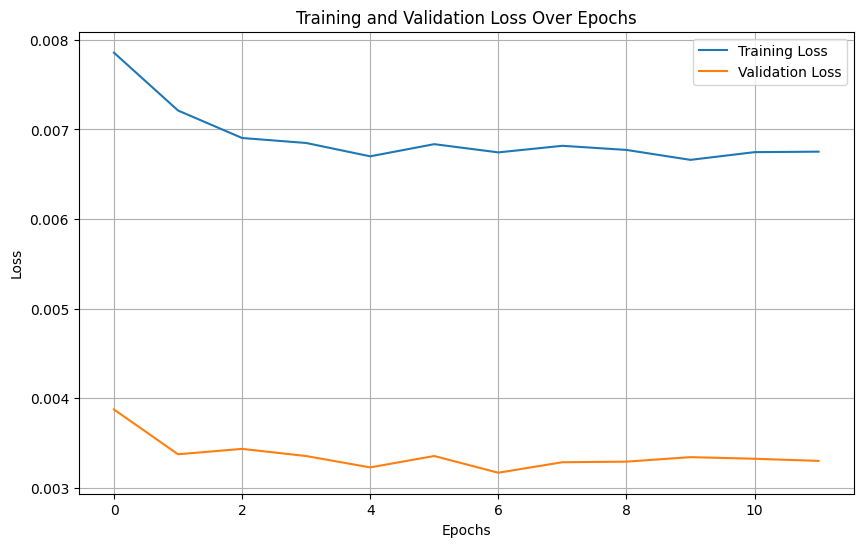

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
df = pd.read_csv('D:/FPT/SU24/DSP391m/code/crawl/data/clean/df_combine.csv')
test_df = df.iloc[-592:]
y_test = test_df.Sell.to_list()
len(y_test)

592

In [13]:
real_pred = real_pred_array[:, :, -1]
real_predict = np.mean(real_pred, axis=1)
len(real_predict)

592

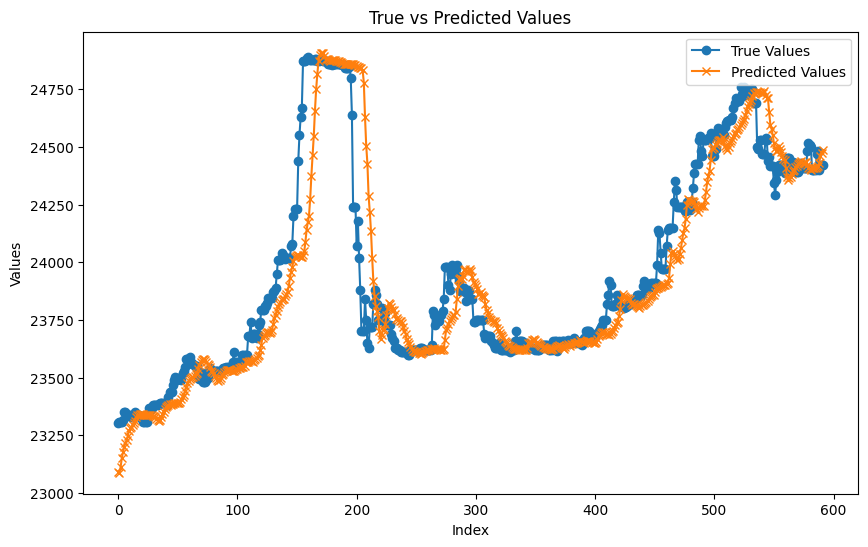

In [14]:
# Ensure y_test and pred_flattened are the same length
assert len(y_test) == len(real_predict), "Lengths of y_test and pred do not match!"

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', marker='o')
plt.plot(real_predict.tolist(), label='Predicted Values', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()